<a href="https://colab.research.google.com/github/kleczekr/tolkenizer/blob/master/violence5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline 

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
# import seaborn as sns

In [2]:
mpl.style.use(['ggplot'])

In [3]:
# This cell is meant to accommodate the Google Colab way of dealing with reading 
# files from Google Drive; feel free to ignore it if you are running the notebook
# on your local machine
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_excel('/content/drive/My Drive/ethnic_violence/globalterrorismdb_0919dist.xlsx')

In [5]:
condition = df.country_txt.isin(['India', 'Pakistan', 'Bangladesh', 'Bhutan', 'Sri Lanka'])
df_sa = df[condition]

In [6]:
df_sa.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
585,197011010001,1970,11,1,NaN,0,NaT,153,Pakistan,6,South Asia,Sindh,Karachi,24.891115,67.143311,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Polish Ministry of Foreign Affairs,Deputy Foreign Minister: Zygfryd Wolniak,...,NaN,NaN,Run down by car,4.0,0.0,0.0,20.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
1186,197202220004,1972,2,22,NaN,0,NaT,92,India,6,South Asia,Delhi,New Delhi,28.585836,77.153336,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,4,Hijacking,NaN,NaN,NaN,NaN,6,Airports & Aircraft,42.0,Aircraft (not at an airport),Lufthansa,B-747,...,NaN,NaN,Explosives,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,1.0,187.0,0.0,NaN,NaN,Yemen,Yemen,1.0,5000000.0,NaN,NaN,NaN,NaN,2.0,Hostage(s) released by perpetrators,187.0,NaN,NaN,NaN,NaN,Hijacking DB,1,1,1,1,NaN
2217,197402020001,1974,2,2,NaN,1,1974-02-03,153,Pakistan,6,South Asia,Sindh,Karachi,24.891115,67.143311,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,11,Maritime,58.0,Commercial Maritime,NaN,Greek Freighter in Karachi,...,NaN,NaN,Automatic firearms; Explosive,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,2.0,0.0,0.0,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2.0,Hostage(s) released by perpetrators,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
2705,197412090001,1974,12,9,NaN,0,NaT,153,Pakistan,6,South Asia,North-West Frontier Province,Peshawar,34.006004,71.537430,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,USIS Center,...,NaN,NaN,Explosive,0.0,0.0,NaN,2.0,2.0,NaN,1,3.0,Minor (likely < $1 million),130000.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
2744,197500000001,1975,0,0,NaN,0,NaT,153,Pakistan,6,South Asia,Punjab,Rawalpindi,33.594013,73.069077,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,6,Airports & Aircraft,42.0,Aircraft (not at an airport),NaN,Pakistan Airlines Boeing 707,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,4.0,Unknown,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN


In [7]:
df_sa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32417 entries, 585 to 191454
Columns: 135 entries, eventid to related
dtypes: datetime64[ns](1), float64(53), int64(24), object(57)
memory usage: 33.6+ MB


In [8]:
sa_ctr = df_sa.groupby(['iyear', 'country_txt']).nkill.sum()

In [9]:
df_sa_ctr = sa_ctr.unstack(level=1).reset_index()

In [10]:
df_sa_ctr.head(30)

country_txt,iyear,Bangladesh,Bhutan,India,Pakistan,Sri Lanka
0,1970,NaN,NaN,NaN,4.0,NaN
1,1972,NaN,NaN,0.0,NaN,NaN
2,1974,NaN,NaN,NaN,0.0,NaN
3,1975,NaN,NaN,4.0,1.0,1.0
4,1976,NaN,NaN,0.0,1.0,NaN
5,1977,0.0,NaN,0.0,NaN,NaN
6,1978,NaN,NaN,NaN,5.0,NaN
7,1979,0.0,NaN,31.0,6.0,2.0
8,1980,6.0,NaN,17.0,17.0,NaN
9,1981,6.0,NaN,24.0,4.0,3.0


In [11]:
df_sa_ctr.tail(30)

country_txt,iyear,Bangladesh,Bhutan,India,Pakistan,Sri Lanka
16,1988,87.0,NaN,966.0,136.0,885.0
17,1989,131.0,NaN,874.0,56.0,1822.0
18,1990,66.0,NaN,907.0,188.0,1505.0
19,1991,69.0,NaN,1113.0,231.0,1034.0
20,1992,101.0,NaN,1152.0,152.0,984.0
21,1994,30.0,NaN,389.0,354.0,186.0
22,1995,35.0,NaN,361.0,712.0,1020.0
23,1996,89.0,NaN,569.0,423.0,827.0
24,1997,14.0,NaN,853.0,443.0,486.0
25,1998,0.0,NaN,398.0,151.0,680.0


In [12]:
norm_bangladesh = (df_sa_ctr['Bangladesh'] - df_sa_ctr['Bangladesh'].min()) / (df_sa_ctr['Bangladesh'].max() - df_sa_ctr['Bangladesh'].min())
norm_bhutan = (df_sa_ctr['Bhutan'] - df_sa_ctr['Bhutan'].min()) / (df_sa_ctr['Bhutan'].max() - df_sa_ctr['Bhutan'].min())
norm_india = (df_sa_ctr['India'] - df_sa_ctr['India'].min()) / (df_sa_ctr['India'].max() - df_sa_ctr['India'].min())
norm_pakistan = (df_sa_ctr['Pakistan'] - df_sa_ctr['Pakistan'].min()) / (df_sa_ctr['Pakistan'].max() - df_sa_ctr['Pakistan'].min())
norm_srilanka = (df_sa_ctr['Sri Lanka'] - df_sa_ctr['Sri Lanka'].min()) / (df_sa_ctr['Sri Lanka'].max() - df_sa_ctr['Sri Lanka'].min())

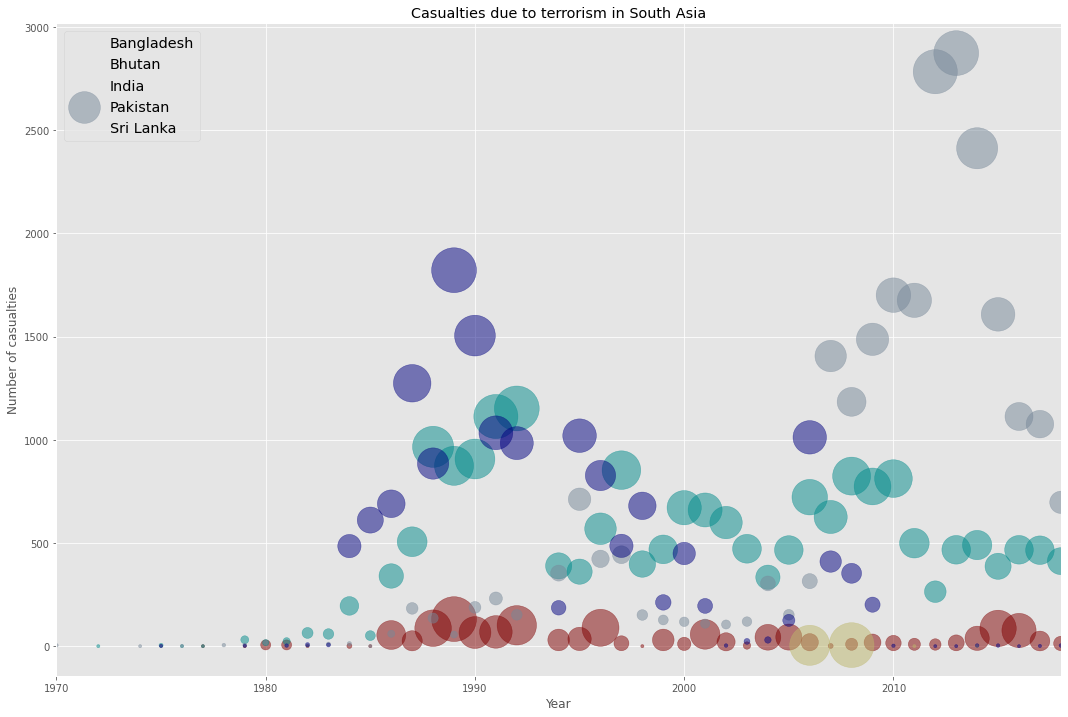

In [13]:
ax0 = df_sa_ctr.plot(kind = 'scatter',
                     x = 'iyear',
                     y = 'Bangladesh',
                     figsize=(18, 12),
                     alpha = 0.5,
                     color = 'maroon',
                     s = norm_bangladesh * 2000 + 10,
                     xlim = (1970, 2018))
ax1 = df_sa_ctr.plot(kind = 'scatter',
                     x = 'iyear',
                     y = 'Bhutan',
                     alpha = 0.5,
                     color = 'darkkhaki',
                     s = norm_bhutan * 2000 + 10,
                     ax = ax0)
ax2 = df_sa_ctr.plot(kind = 'scatter',
                     x = 'iyear',
                     y = 'India',
                     alpha = 0.5,
                     color = 'darkcyan',
                     s = norm_india * 2000 + 10,
                     ax = ax0)
ax3 = df_sa_ctr.plot(kind = 'scatter',
                     x = 'iyear',
                     y = 'Pakistan',
                     alpha = 0.5,
                     color = 'lightslategrey',
                     s = norm_pakistan * 2000 + 10,
                     ax = ax0)
ax4 = df_sa_ctr.plot(kind = 'scatter',
                     x = 'iyear',
                     y = 'Sri Lanka',
                     alpha = 0.5,
                     color = 'navy',
                     s = norm_srilanka * 2000 + 10,
                     ax = ax0)

ax0.set_ylabel('Number of casualties')
ax0.set_xlabel('Year')
ax0.set_title('Casualties due to terrorism in South Asia')
ax0.legend(['Bangladesh', 'Bhutan', 'India', 'Pakistan', 'Sri Lanka'], loc='upper left', fontsize='x-large')

Notice that Pakistan is the only country featured properly in the legend. This is due to the fact that it was the only country which had a positive value in the first row of the dataframe that we used. Let's try to fix this---we'll convert the NaN values to zeroes, then redo the plot:

In [14]:
df_sa_ctr = df_sa_ctr.fillna(0)

In [15]:
norm_bangladesh = (df_sa_ctr['Bangladesh'] - df_sa_ctr['Bangladesh'].min()) / (df_sa_ctr['Bangladesh'].max() - df_sa_ctr['Bangladesh'].min())
norm_bhutan = (df_sa_ctr['Bhutan'] - df_sa_ctr['Bhutan'].min()) / (df_sa_ctr['Bhutan'].max() - df_sa_ctr['Bhutan'].min())
norm_india = (df_sa_ctr['India'] - df_sa_ctr['India'].min()) / (df_sa_ctr['India'].max() - df_sa_ctr['India'].min())
norm_pakistan = (df_sa_ctr['Pakistan'] - df_sa_ctr['Pakistan'].min()) / (df_sa_ctr['Pakistan'].max() - df_sa_ctr['Pakistan'].min())
norm_srilanka = (df_sa_ctr['Sri Lanka'] - df_sa_ctr['Sri Lanka'].min()) / (df_sa_ctr['Sri Lanka'].max() - df_sa_ctr['Sri Lanka'].min())

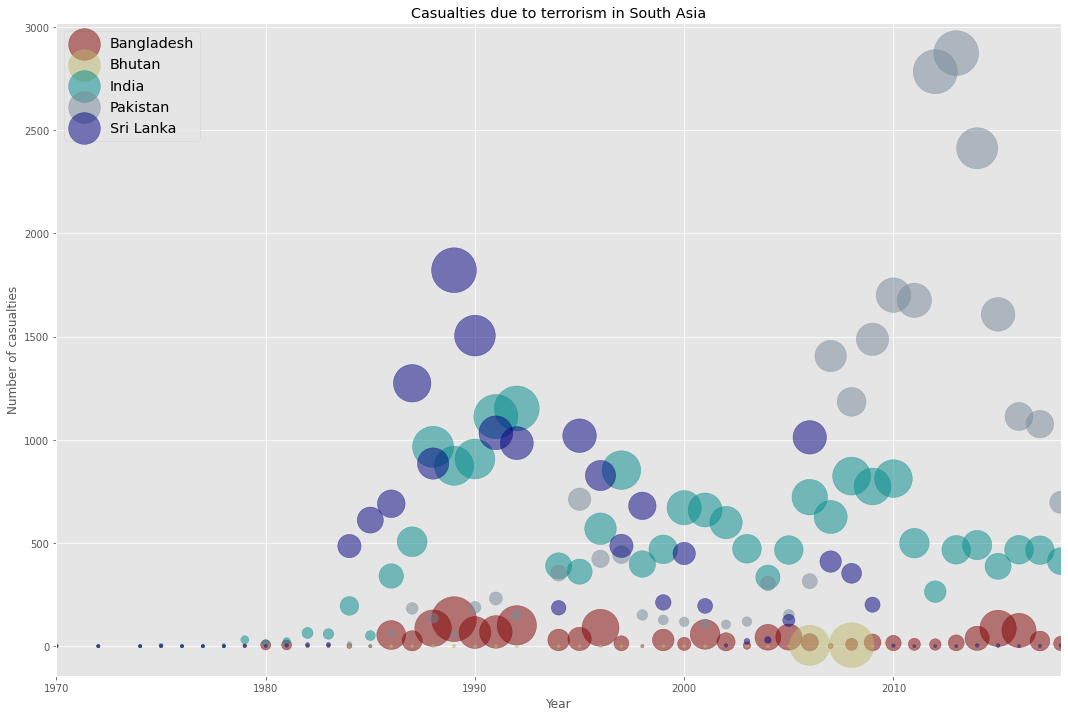

In [16]:
ax0 = df_sa_ctr.plot(kind = 'scatter',
                     x = 'iyear',
                     y = 'Bangladesh',
                     figsize=(18, 12),
                     alpha = 0.5,
                     color = 'maroon',
                     s = norm_bangladesh * 2000 + 10,
                     xlim = (1970, 2018))
ax1 = df_sa_ctr.plot(kind = 'scatter',
                     x = 'iyear',
                     y = 'Bhutan',
                     alpha = 0.5,
                     color = 'darkkhaki',
                     s = norm_bhutan * 2000 + 10,
                     ax = ax0)
ax2 = df_sa_ctr.plot(kind = 'scatter',
                     x = 'iyear',
                     y = 'India',
                     alpha = 0.5,
                     color = 'darkcyan',
                     s = norm_india * 2000 + 10,
                     ax = ax0)
ax3 = df_sa_ctr.plot(kind = 'scatter',
                     x = 'iyear',
                     y = 'Pakistan',
                     alpha = 0.5,
                     color = 'lightslategrey',
                     s = norm_pakistan * 2000 + 10,
                     ax = ax0)
ax4 = df_sa_ctr.plot(kind = 'scatter',
                     x = 'iyear',
                     y = 'Sri Lanka',
                     alpha = 0.5,
                     color = 'navy',
                     s = norm_srilanka * 2000 + 10,
                     ax = ax0)

ax0.set_ylabel('Number of casualties')
ax0.set_xlabel('Year')
ax0.set_title('Casualties due to terrorism in South Asia')
ax0.legend(['Bangladesh', 'Bhutan', 'India', 'Pakistan', 'Sri Lanka'], loc='upper left', fontsize='x-large')